In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv('datasets/placement2.csv')

In [108]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


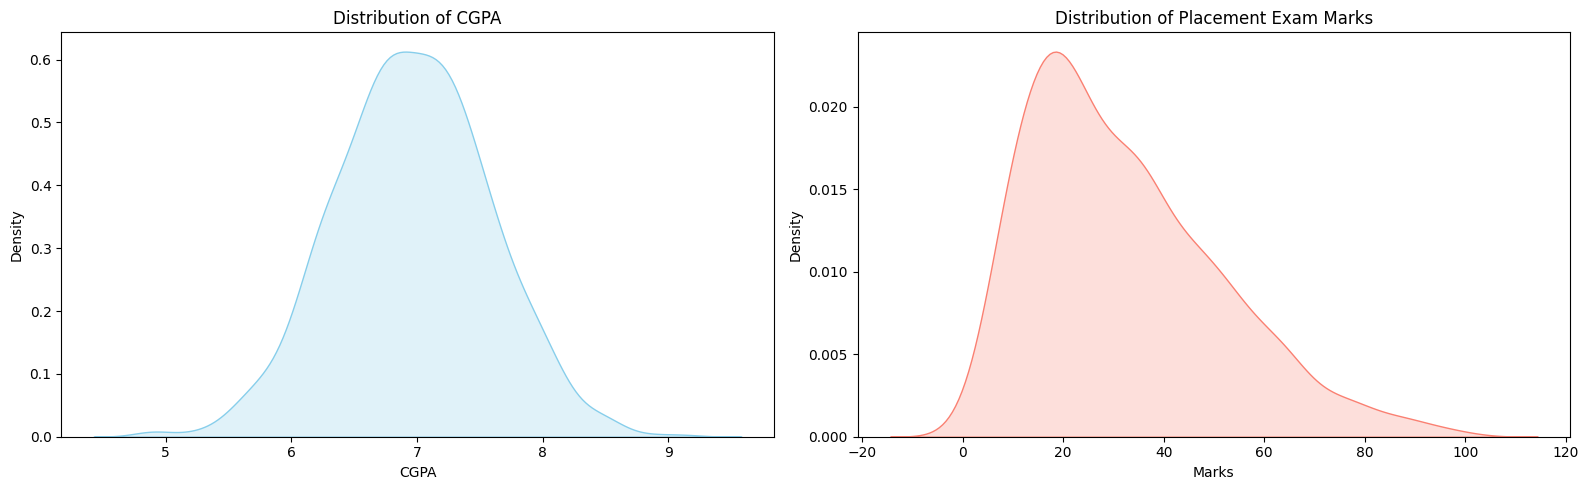

In [109]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# CGPA Distribution (using kdeplot, no 'kde' argument needed)
sns.kdeplot(df['cgpa'], fill=True, color='skyblue', ax=ax1)
ax1.set_title('Distribution of CGPA')
ax1.set_xlabel('CGPA')
ax1.set_ylabel('Density')

# Placement Exam Marks Distribution
sns.kdeplot(df['placement_exam_marks'], fill=True, color='salmon', ax=ax2)
ax2.set_title('Distribution of Placement Exam Marks')
ax2.set_xlabel('Marks')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()


In [110]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [111]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

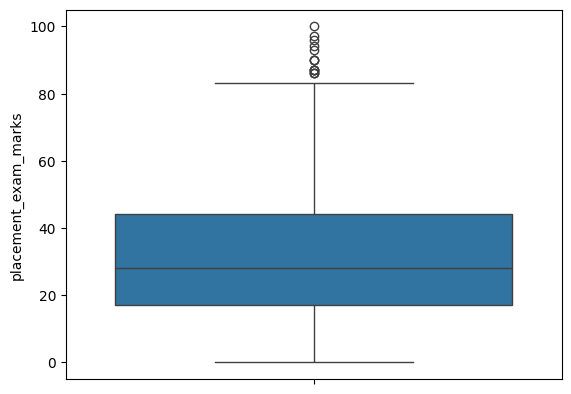

In [112]:
sns.boxplot(df['placement_exam_marks']);

In [113]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [114]:
percentile25

17.0

In [115]:
percentile75

44.0

In [117]:
iqr = percentile75 - percentile25
iqr

27.0

In [118]:
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)

In [121]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


## Finding Outliers

In [125]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [124]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


### Trimming

In [126]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [127]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [128]:
new_df.shape

(985, 3)

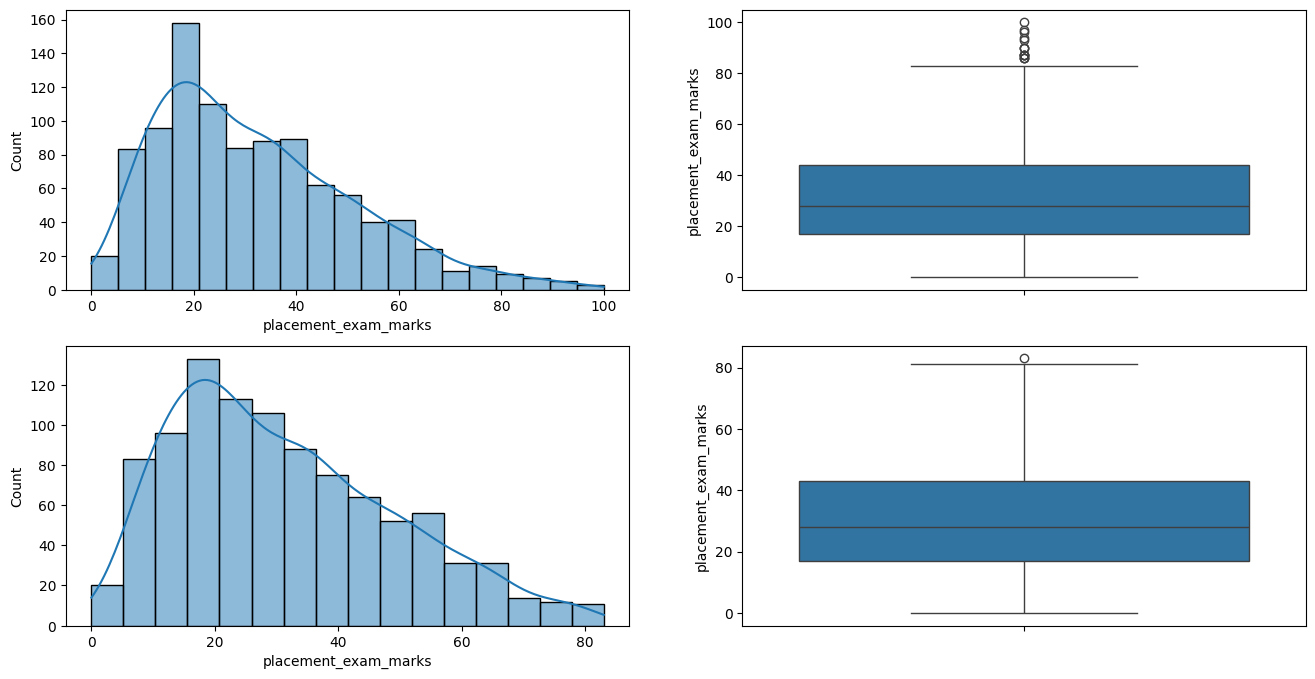

In [134]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde = True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'], kde = True)

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

## Capping

In [ ]:
# np.where(condtion,true,false)

In [139]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [140]:
new_df_cap.shape

(1000, 3)

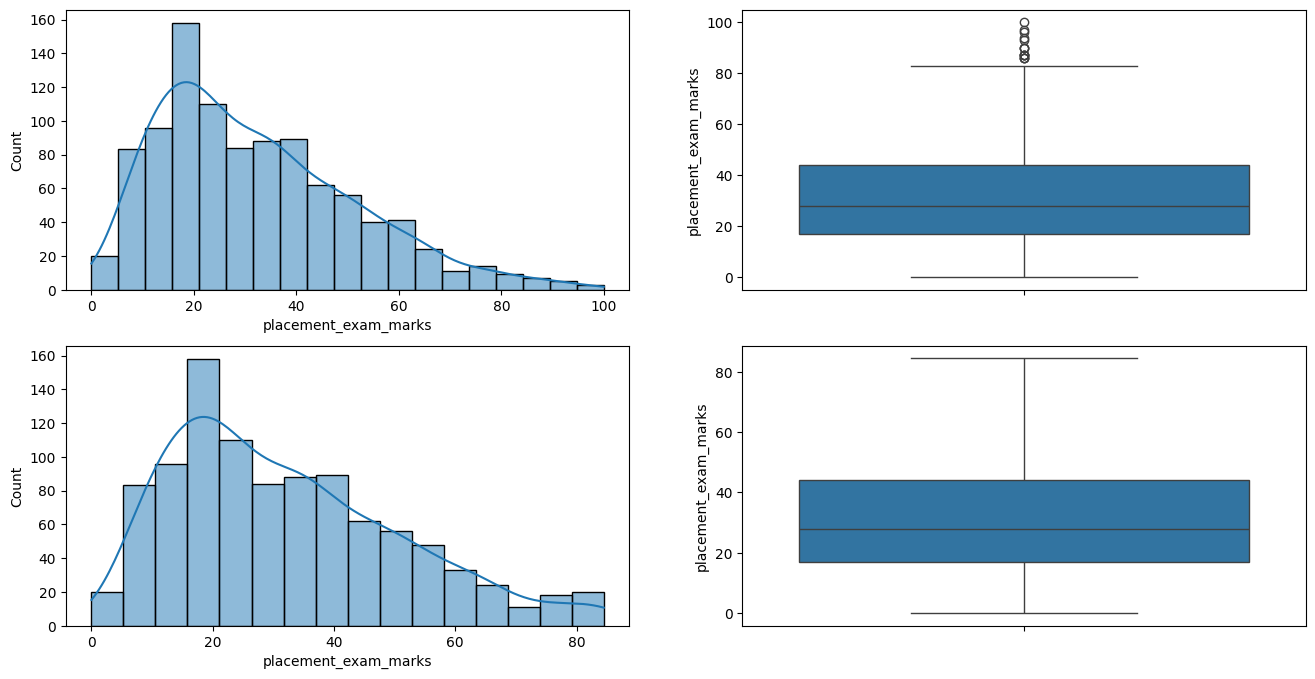

In [141]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde = True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'], kde = True)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()
